In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
plt.rcParams['font.size'] = 14
import pylab_util as PU
import os
import control

In [25]:
fn = 'test_03_MPU_6050.csv'
data = np.loadtxt(fn, delimiter=',')
n = data[:,0]
t_ms = data[:,1]
t = t_ms/1000.0
dt_vect = t[1:] - t[0:-1]
dtm = dt_vect.mean()
thd = data[:,2]
enc = data[:,3]
amp = data[:,4]
compY = data[:,5]
ax = data[:,6]
ay = data[:,7]
az = data[:,8]
gx = data[:,9]
gy = data[:,10]
gz = data[:,11]

In [26]:
def plot_list(vlist, sep=False):
    if not sep:
        plt.figure()
    for vect in vlist:
        if sep:
            plt.figure()
        plt.plot(t_ms,vect)

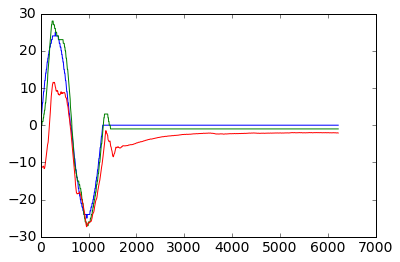

In [27]:
plot_list([thd,enc,compY])

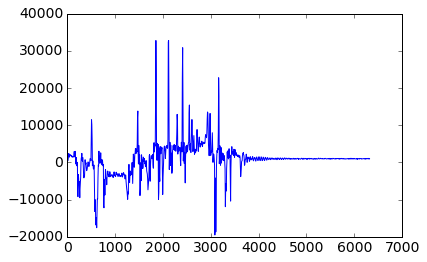

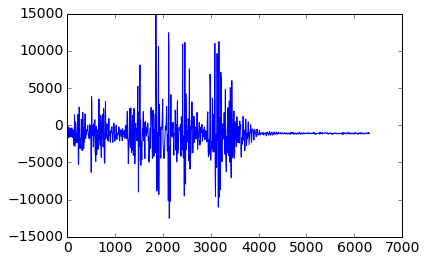

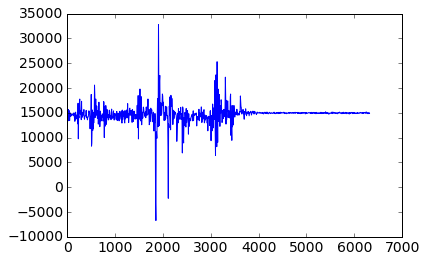

In [6]:
plot_list([ax,ay,az],sep=1)

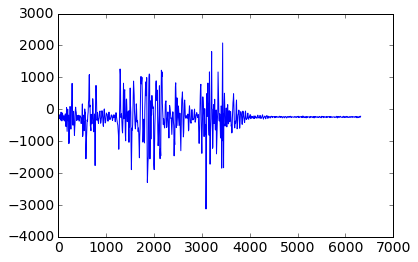

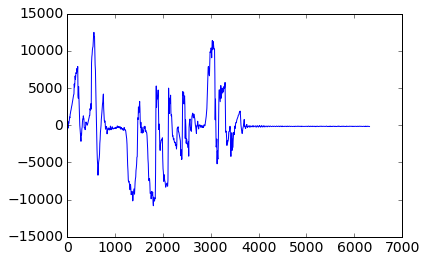

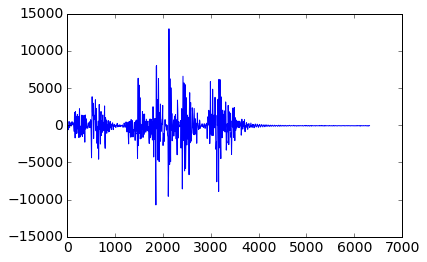

In [7]:
plot_list([gx,gy,gz],sep=1)

In [8]:
wn = 1.0*2*np.pi

In [9]:
lp = control.TransferFunction(wn,[1,wn])
lp


  6.283
---------
s + 6.283

In [10]:
hp = control.TransferFunction([1,0],[1,wn])
hp


    s
---------
s + 6.283

In [11]:
lp_z = control.matlab.c2d(lp,dtm,method='tustin')
lp_z


0.0195 z + 0.0195
-----------------
    z - 0.961

dt = 0.00633029058116

In [12]:
b_lp = np.squeeze(lp_z.num)
b_lp

array([ 0.01949941,  0.01949941])

In [13]:
a_lp = np.squeeze(lp_z.den)
a_lp

array([ 1.        , -0.96100119])

In [14]:
from scipy import signal

In [15]:
ax_filt = signal.lfilter(b_lp, a_lp, ax)

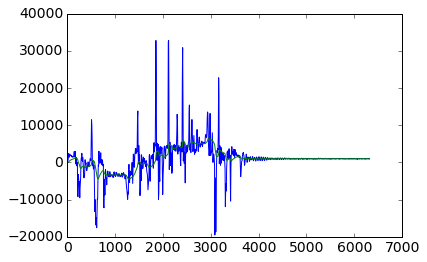

In [16]:
plot_list([ax,ax_filt])

In [17]:
hp_z = control.matlab.c2d(hp,dtm,method='tustin')
hp_z


0.9805 z - 0.9805
-----------------
    z - 0.961

dt = 0.00633029058116

In [18]:
b_hp = np.squeeze(hp_z.num)
b_hp

array([ 0.98050059, -0.98050059])

In [19]:
a_hp = np.squeeze(hp_z.den)
a_hp

array([ 1.        , -0.96100119])

In [20]:
theta_y_filt = signal.lfilter(b_hp, a_hp, thetay)

NameError: name 'thetay' is not defined